#                                       **Fraud Detection**

![](C:\Users\Ravindra\Downloads\OIP.jpg)

## Goal
The primary objective of this analysis is to develop a robust classification model that can accurately predict whether a given online transaction is fraudulent or not. Leveraging the features provided in the dataset, the goal is to train a machine learning model capable of distinguishing between legitimate and fraudulent transactions

## Approach:
**Exploratory Data Analysis (EDA):**
Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves the use of statistical and graphical techniques to explore the characteristics of a dataset, understand its underlying structure, and uncover patterns, trends, relationships, and potential outliers. EDA is typically performed at the early stages of a data science or machine learning project to gain insights and inform subsequent steps in the analysis.

**Data Preprocessing:**
Address any missing or anomalous values in the dataset. Encode categorical variables, if necessary. Scale numerical features to ensure uniformity in their impact on the model.

**Handling Imbalance:**
Implement techniques to address class imbalance, such as oversampling the minority class (fraudulent transactions) using methods like SMOTE or undersampling the majority class.

**Model Selection:**
Experiment with different classification algorithms such as Logistic Regression, Random Forest, XGBoost, etc. Utilize appropriate evaluation metrics for imbalanced datasets, emphasizing metrics like precision, recall, F1-score, and ROC-AUC.

**Hyperparameter Tuning:**
Conduct a systematic search for optimal hyperparameters using techniques like GridSearchCV or RandomizedSearchCV to improve model performance.

**Model Evaluation:**
Evaluate the performance of the trained model on a separate test dataset. Assess the model's ability to correctly classify fraudulent transactions while minimizing false positives.

**Interpretability and Explainability:**
Strive for a model that not only performs well but is also interpretable. Understand the importance of each feature in the decision-making process.


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

In [2]:
df=pd.read_csv(r"C:\Users\Ravindra\Downloads\projects\Payment data.csv")

In [3]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

=========================================================================================================================

#### Data description
This dataset contains information about online transactions and their characteristics. Each transaction is represented by 
a row in the dataset

Step:- Represet unit of a time where each step correspond each hour

Type:- type of transaction such as CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER.Describes the nature of the 
    financial activity in each transaction

Amount:- Represents the amount of funds involved in each financial operation.

nameOrig:- customer initiating the transaction, ach transaction with the account holder responsible for its initiation
    
oldbalanceOrg:-  initial account balance of the customer before the transaction,starting financial 
    position of the account holder.
    
newbalanceDest:- new account balance of the customer after the transaction. financial status of the account
    holder following the transaction.
    
nameDest:-  the recipient customer of the transaction.transactions with the account to which funds are being transferred
    
oldbalanceDest:- initial account balance of the recipient before the transaction. There is not information for customers
    that start with M
    
newbalanceDest:- the new account balance of the recipient after the transaction. There is not information for customers 
    that start with M 

isFraud:- Binary indicator (0 or 1) highlighting whether the transaction is fraudulent (1) or not (0).
                 ,Identifies transactions involving fraudulent behavior within the simulation.
                
**========================================================================================================================**


.

## Exploratory Data Analysis (EDA):

In [5]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [6]:
df.tail()

step      type      amount     nameOrig  oldbalanceOrg  \
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6362615             0.0   C776919290            0.00       339682.13        1   
6362616             0.0  C1881841831            0.00            0.00        1   
6362617             0.0  C1365125890        68488.84      6379898.11        1   
6362618             0.0  C2080388513            0.00            0.00        1   
6362619             0.0   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#There are no missing values in the dataset.Each column has a count of zero when assessed for the presence of null or missing #values, indicating that the dataset is complete and does not require imputation for any of its attributes. 

-------------------------------------------------------------------------------------------------------------------------

,

In [9]:
df.shape

(6362620, 11)

 **The shape of the Dataset:**
 
 number of rows is a detaset are:6362620  
 number of columns:11
 -----------------------------------------------------------------------------------------------------------------------------

,

In [10]:
unique_types = df['type'].unique();
type_counts = df['type'].value_counts()

num_unique_types = len(unique_types)
print(type_counts)

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


**The types of transaction made by customers** 

*_CASH_OUT: 2,237,500 transactions  
PAYMENT: 2,151,495 transactions  
CASH_IN: 1,399,284 transactions  
TRANSFER: 532,909 transactions  
DEBIT: 41,432 transactions_*  

This information provides an overview of the variety and prevalence of transaction types within the dataset.

------------------------------------------------------------------------------------------------------------------------

,

### The Transaction Type data  Distribution

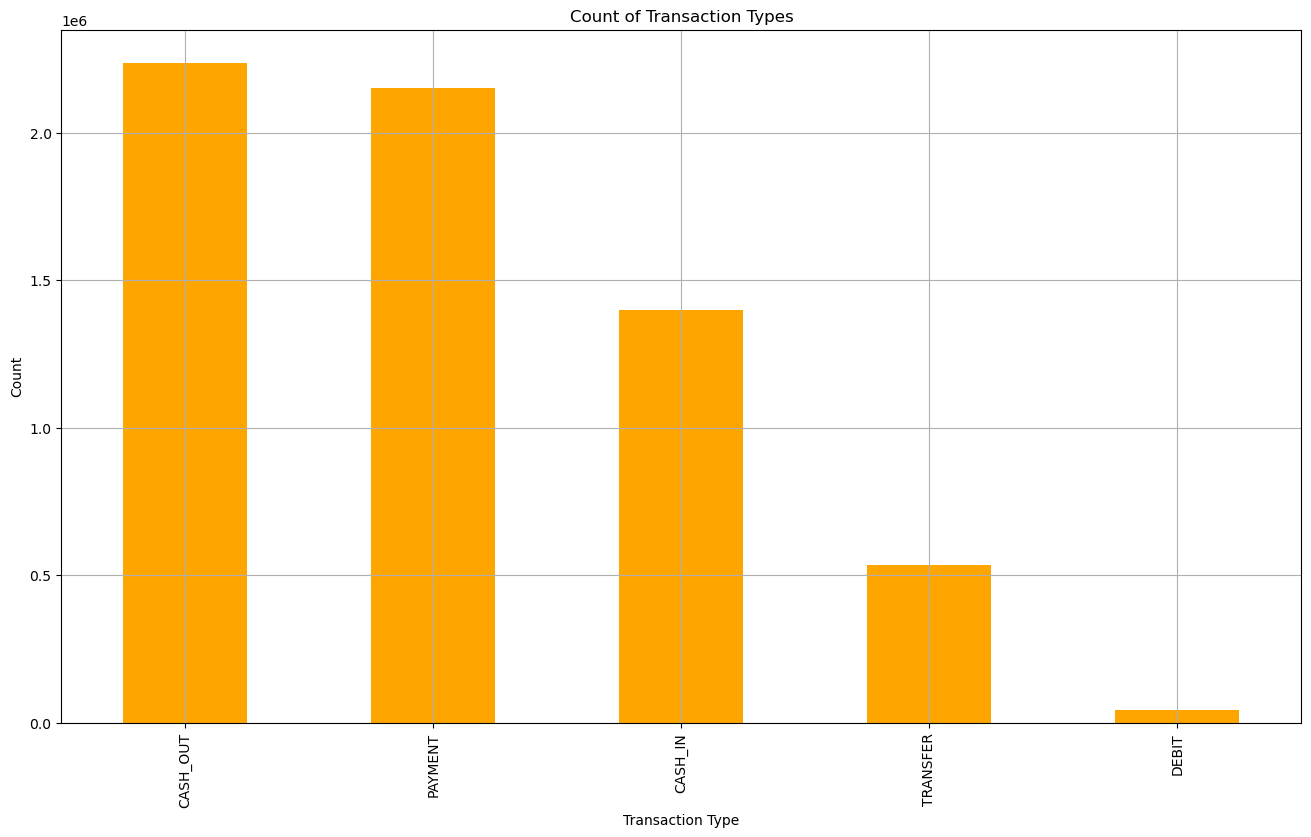

In [11]:
plt.figure(figsize=(16, 9))
plt.title('Count of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
bars = type_counts.plot(kind='bar', color='orange')
plt.grid()
plt.show()

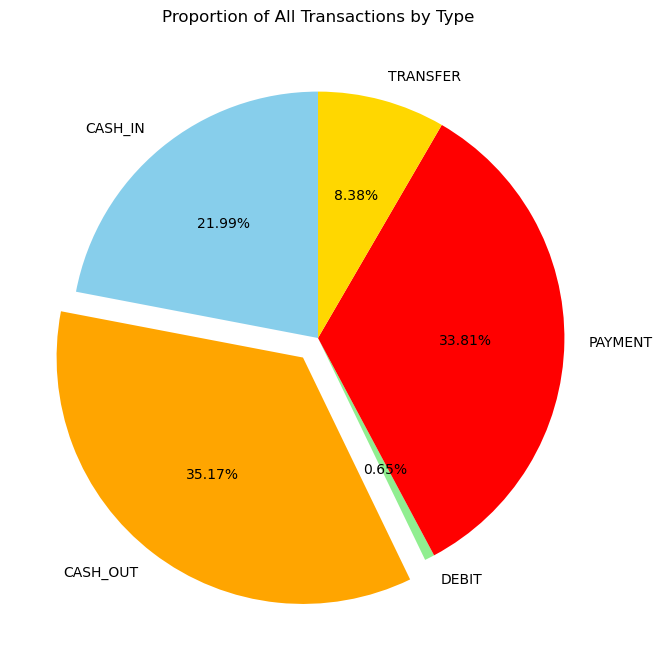

In [12]:
all_counts_by_type = df.groupby("type").size()
plt.figure(figsize=(8, 8))
plt.pie(all_counts_by_type, labels=all_counts_by_type.index, autopct='%1.2f%%', startangle=90, colors=['skyblue', 'orange', 'lightgreen', 'red', 'gold'], explode=(0, 0.1, 0, 0, 0))
plt.title('Proportion of All Transactions by Type')
plt.show()

* The  above Bar chart and Pie chart illustrates the proportion of each transaction type relative to the total number of transactions
* Were the Cash out is higher made transaction the Payment 
* the Cash in and Transfer are frequently less
* and the debit Transaction made only few times as it shows only 0.65%


.

-----------------------------------------------------------------------------------------------------------------------------

### Correlation Between Freatures and traget

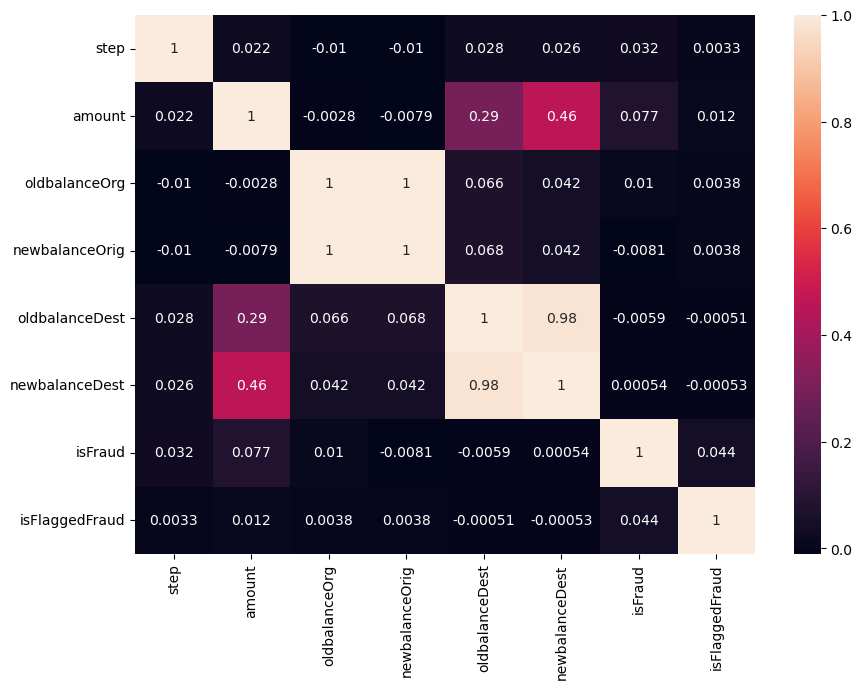

In [13]:
correlationdata = df.copy()
correlationdata.drop(['type'], axis = 1, inplace = True)

fig = plt.figure(figsize =(10, 7))
sns.heatmap(correlationdata.corr(), annot = True)
plt.show()

* As there is almost no correlation above .5 between the columns
* All the columns is not good correlated with each other 
* Those who's correlation are above .5 these are hold the important data and if we remove those it can affect the accurecy of model



,

-------------------------------------------------------------------------------------------------------------------------------

### Sepration of statistical Informal of Fraud transactions and Non-Fraud transactions Over month:

In [14]:
pd.set_option('display.float_format', '{:,.2f}'.format)
print("Statistics on the amounts for non-fraud transactions:\n", pd.DataFrame.describe(df[df["isFraud"] == 0].amount), "\n")
print("Statistics on the amounts for fraud transactions:\n", pd.DataFrame.describe(df[df["isFraud"] == 1].amount), "\n")

Statistics on the amounts for non-fraud transactions:
 count    6,354,407.00
mean       178,197.04
std        596,236.98
min              0.01
25%         13,368.40
50%         74,684.72
75%        208,364.76
max     92,445,516.64
Name: amount, dtype: float64 

Statistics on the amounts for fraud transactions:
 count        8,213.00
mean     1,467,967.30
std      2,404,252.95
min              0.00
25%        127,091.33
50%        441,423.44
75%      1,517,771.48
max     10,000,000.00
Name: amount, dtype: float64 



#### Observation
Fraudulent transactions, on average, involve significantly higher amounts compared to non-fraudulent transactions
The standard deviation for fraud transactions is notably higher, indicating a wider range of transaction amounts.
The minimum amount for fraud transactions is $0, suggesting negligible  values in fraudulent activities.


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### The Data Distribution for Fraud and Non-Fraud transactions

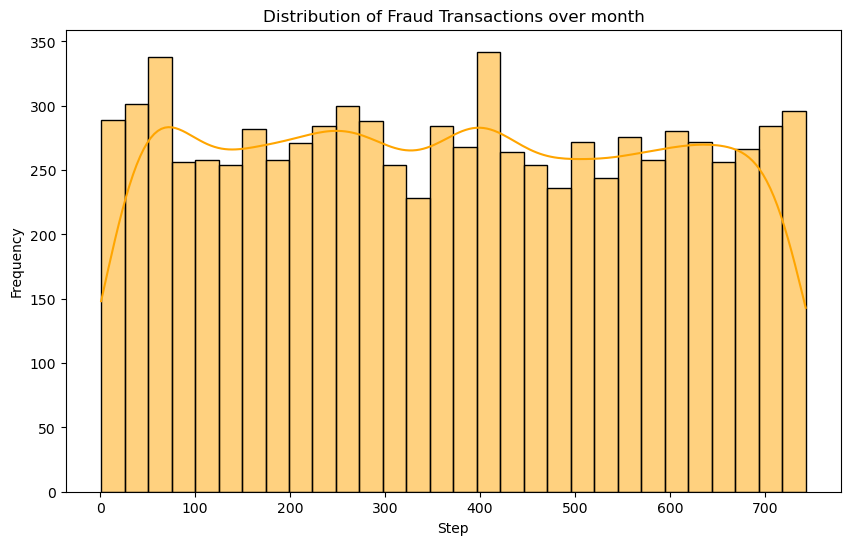

In [15]:
fraud_transactions=df[df['isFraud']==1]

plt.figure(figsize=(10, 6))
sns.histplot(fraud_transactions["step"], bins=30, kde=True, color='orange', edgecolor='black')
plt.title('Distribution of Fraud Transactions over month')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.show()

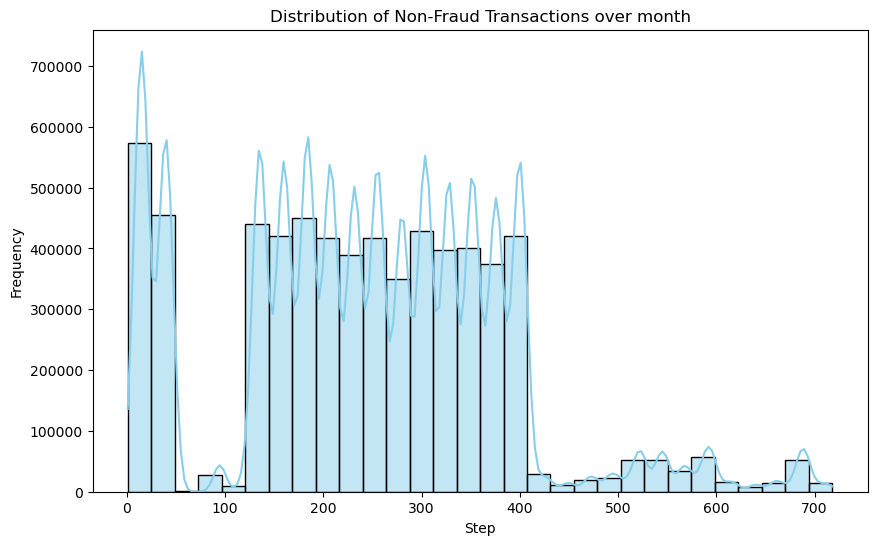

In [16]:
non_fraud_transactions = df[df["isFraud"] == 0]
plt.figure(figsize=(10, 6))
sns.histplot(non_fraud_transactions["step"], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Non-Fraud Transactions over month')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.show()

Many fraud transactions are linked to customers whose account balances drop to zero afterward. This pattern implies that 
fraudsters often manipulate transactions to deplete or minimize the affected customers' balances. Detecting and keeping an eye 
on instances where substantial transactions result in zero balances is crucial for preventing and identifying fraud. 
Understanding this pattern helps improve security measures and safeguards against fraudulent activities that aim to drain 
customer accounts.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Outlires Detection

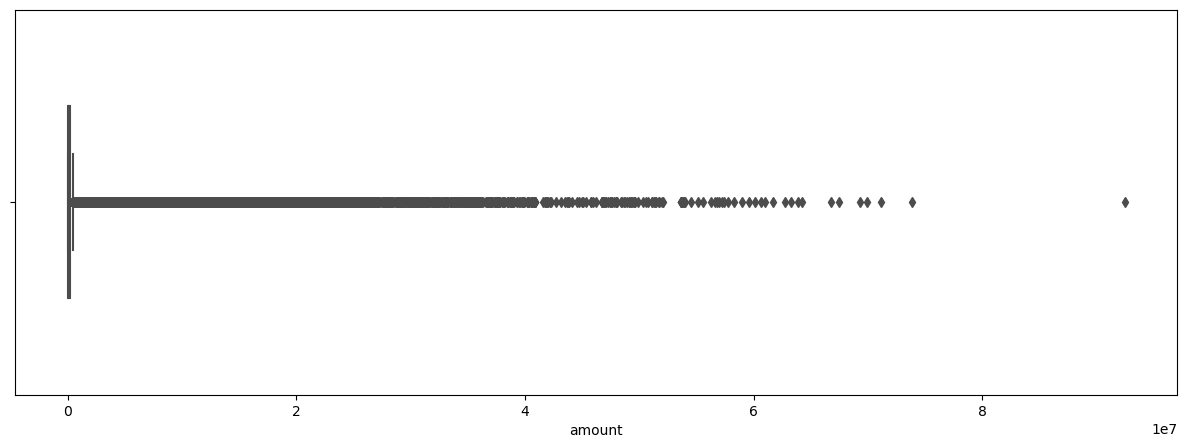

In [17]:
#finding outliers in amount
plt.figure(figsize=(15,5))
sns.boxplot(x=df.amount, color='blue', width=0.5);

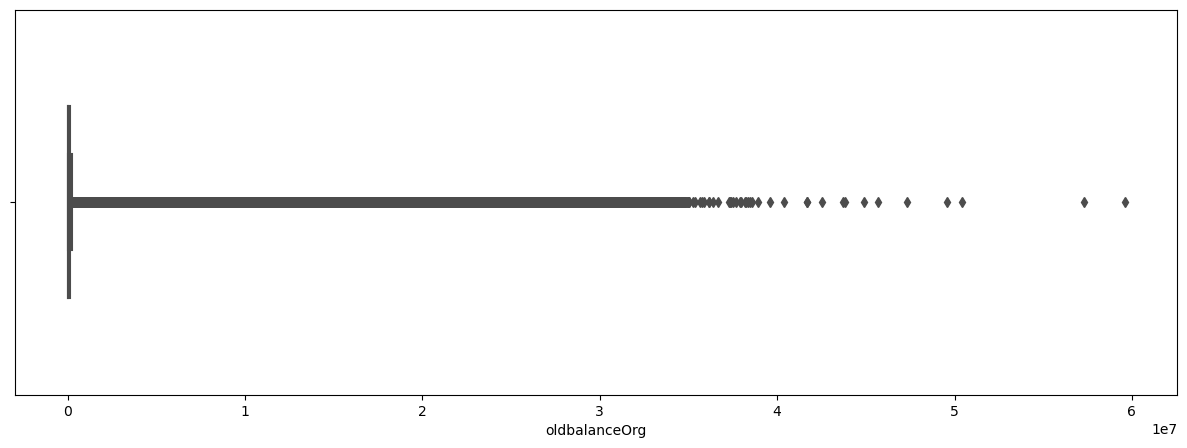

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.oldbalanceOrg, color='blue', width=0.5);

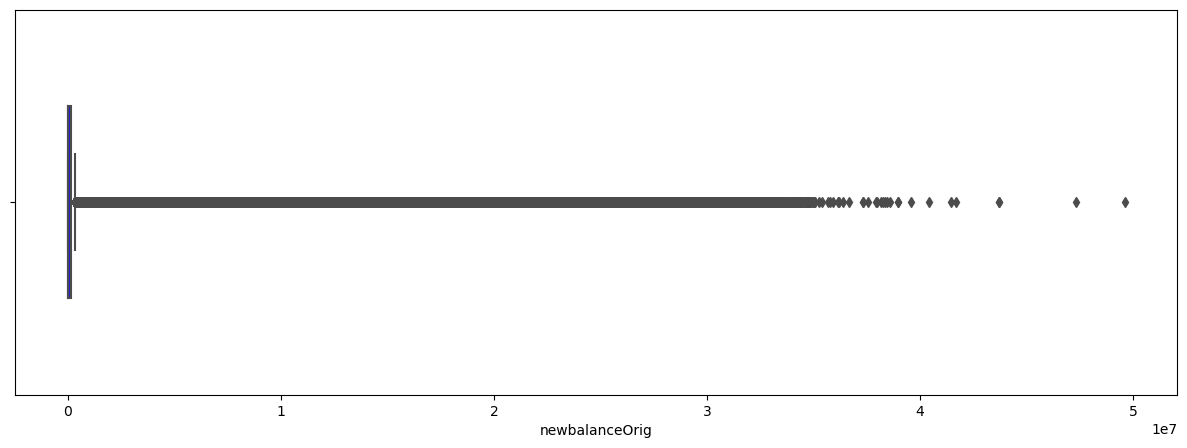

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.newbalanceOrig, color='blue', width=0.5);

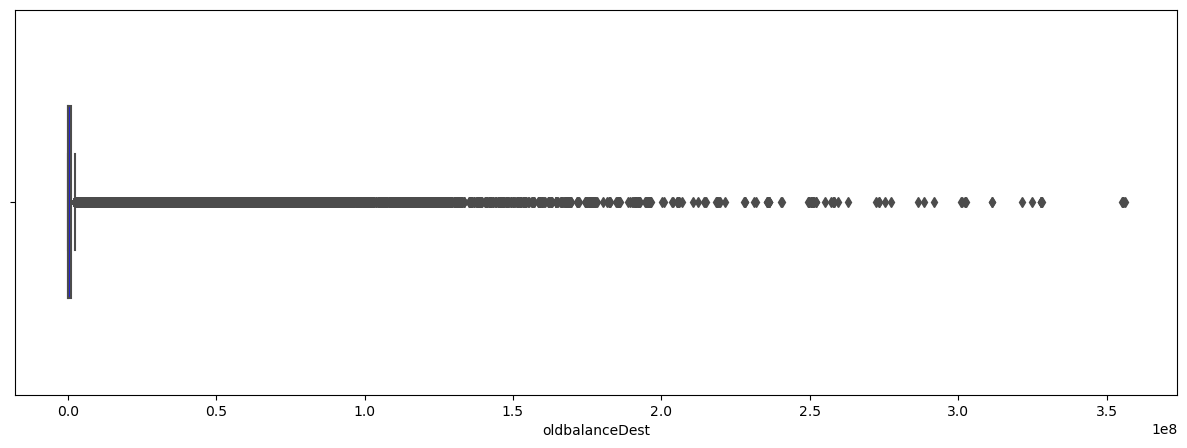

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.oldbalanceDest, color='blue', width=0.5);

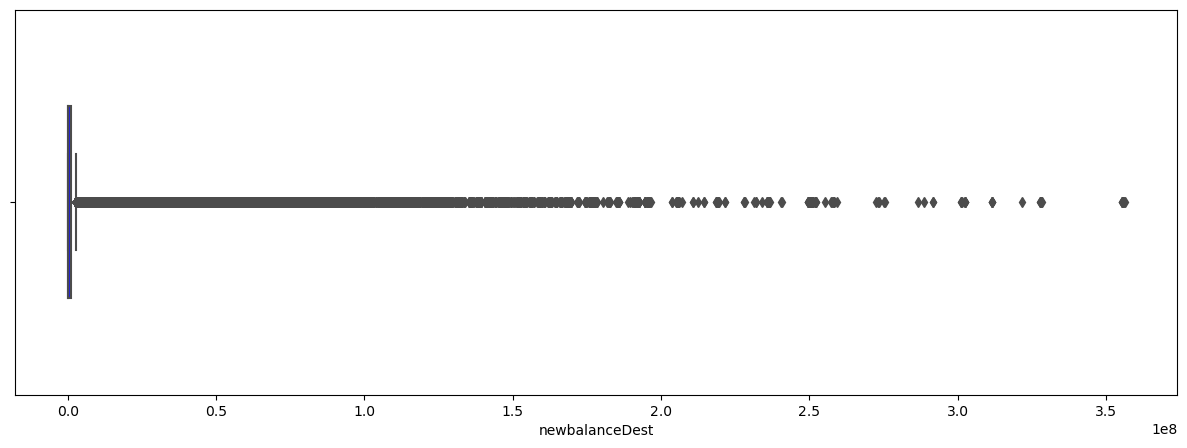

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.newbalanceDest, color='blue', width=0.5);

Since dataset is imbalance removing outliers may remove the required data considering that we have not removed the 
outliers and performed the undersampling in further process.

from above boxplots we can find that there are lots of outliers present in each features.So after dropping the outliers
using IQR method,We deleted almost all fraud transactions from the dataframe. Only 26 fraud transcations remain in the
entire data frame. So removing Outliers in this case is not good option.

,

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Distribution only Fraud and Non-Fraud transaction of Data

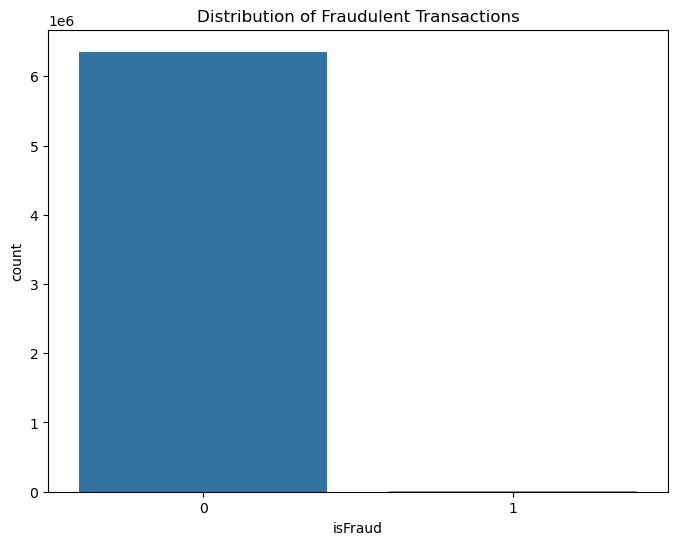

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

* As shown in the graph The no of Non Fraud transaction are more and Fraud transaction are less But Fraud Transaction are present
* The data is highly unbalence of Fraud and Non Fraud transaction 
* The data may need to balencing if the accurecy not shown good result

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Data Cleaning and preprocessing

In [4]:
df.drop(['step','isFlaggedFraud'], axis=1, inplace=True)

In [5]:
df.drop(['nameOrig','nameDest'], axis=1, inplace=True)

1. isflaggedfraud: This column wasnt included in the dataset information that was provided, so we will drop this column as the labeled column is already present.  
2. Column nameOrig and nameDest are less informative it did not affect for the output of Data

**Removing the less informative columns**

--------------------------------------------------------------------------------------------------------------------------------

In [25]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [6]:
df['type']=df['type'].map({'CASH_OUT':1,'PAYMENT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5})

* Encoding the Type column (Type of Transaction) using map function 
* The column were encoding same as Label Encoder without importing label encoder

-------------------------------------------------------------------------------------------------------------------------------

In [7]:
df.head()

type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     2   9839.64       170136.0       160296.36             0.0   
1     2   1864.28        21249.0        19384.72             0.0   
2     4    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     2  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0        0  
1             0.0        0  
2             0.0        1  
3             0.0        1  
4             0.0        0

In [28]:
df.describe().T

count         mean          std  min       25%  \
type           6,362,620.00         2.06         0.98 1.00      1.00   
amount         6,362,620.00   179,861.90   603,858.23 0.00 13,389.57   
oldbalanceOrg  6,362,620.00   833,883.10 2,888,242.67 0.00      0.00   
newbalanceOrig 6,362,620.00   855,113.67 2,924,048.50 0.00      0.00   
oldbalanceDest 6,362,620.00 1,100,701.67 3,399,180.11 0.00      0.00   
newbalanceDest 6,362,620.00 1,224,996.40 3,674,128.94 0.00      0.00   
isFraud        6,362,620.00         0.00         0.04 0.00      0.00   

                      50%          75%            max  
type                 2.00         3.00           5.00  
amount          74,871.94   208,721.48  92,445,516.64  
oldbalanceOrg   14,208.00   107,315.18  59,585,040.37  
newbalanceOrig       0.00   144,258.41  49,585,040.37  
oldbalanceDest 132,705.66   943,036.71 356,015,889.35  
newbalanceDest 214,661.44 1,111,909.25 356,179,278.92  
isFraud              0.00         0.00           1.00

--------------------------------------------------------------------------------------------------------------------------------

### data sepration On Features and target columns

In [29]:
df

type       amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           2     9,839.64     170,136.00      160,296.36            0.00   
1           2     1,864.28      21,249.00       19,384.72            0.00   
2           4       181.00         181.00            0.00            0.00   
3           1       181.00         181.00            0.00       21,182.00   
4           2    11,668.14      41,554.00       29,885.86            0.00   
...       ...          ...            ...             ...             ...   
6362615     1   339,682.13     339,682.13            0.00            0.00   
6362616     4 6,311,409.28   6,311,409.28            0.00            0.00   
6362617     1 6,311,409.28   6,311,409.28            0.00       68,488.84   
6362618     4   850,002.52     850,002.52            0.00            0.00   
6362619     1   850,002.52     850,002.52            0.00    6,510,099.11   

         newbalanceDest  isFraud  
0                  0.00        0  
1                  0.00        0  
2                  0.00        1  
3                  0.00        1  
4                  0.00        0  
...                 ...      ...  
6362615      339,682.13        1  
6362616            0.00        1  
6362617    6,379,898.11        1  
6362618            0.00        1  
6362619    7,360,101.63        1  

[6362620 rows x 7 columns]

In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [31]:
x.head()

type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     2  9,839.64     170,136.00      160,296.36            0.00   
1     2  1,864.28      21,249.00       19,384.72            0.00   
2     4    181.00         181.00            0.00            0.00   
3     1    181.00         181.00            0.00       21,182.00   
4     2 11,668.14      41,554.00       29,885.86            0.00   

   newbalanceDest  
0            0.00  
1            0.00  
2            0.00  
3            0.00  
4            0.00

In [32]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

#### Observation


**Data is highly unbalance so we perform sampling for balencing the data**  
 Non Fraud transaction are more and Fraud transaction are less But Fraud Transaction are present   
 The data is highly unbalence of Fraud and Non Fraud transaction    
 The data may need to balencing if the accurecy not shown good result**  

,

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [9]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\python\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
counter=Counter(ytrain)
print('Before',counter)
sm=SMOTE()
xtrain,ytrain=sm.fit_resample(xtrain,ytrain)
xtrains,ytrains=sm.fit_resample(xtrain,ytrain.ravel())

counter=Counter(ytrains)
print('After',counter)

## Sampling

In [12]:
import imblearn

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\python\Lib\site-packages\sklearn\utils\_param_validation.py)

#### Upon analysis of the data After Performing Sampling The data is equally balence

--------------------------------------------------------------------------------------------------------------------------------

### The Data distribution after performing sampling on the data to make data balence

In [38]:
import plotly.graph_objects as go

# Assuming you have undersampled data and stored the class counts in a dictionary
undersampled_data = {
    'Fraud': 50,
    'Normal': 50,
}

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=list(undersampled_data.keys()), values=list(undersampled_data.values()))])
fig.update_layout(title='Undersampled Data Distribution')

fig.show()

In [39]:
X_res

type       amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         1   183,806.32      19,391.00            0.00      382,572.19   
1         2       521.37           0.00            0.00            0.00   
2         2     3,478.18      19,853.00       16,374.82            0.00   
3         2     1,716.05       5,769.17        4,053.13            0.00   
4         3   253,129.93   1,328,499.49    1,581,629.42    2,713,220.48   
...     ...          ...            ...             ...             ...   
16421     1   339,682.13     339,682.13            0.00            0.00   
16422     4 6,311,409.28   6,311,409.28            0.00            0.00   
16423     1 6,311,409.28   6,311,409.28            0.00       68,488.84   
16424     4   850,002.52     850,002.52            0.00            0.00   
16425     1   850,002.52     850,002.52            0.00    6,510,099.11   

       newbalanceDest  
0          566,378.51  
1                0.00  
2                0.00  
3                0.00  
4        2,460,090.55  
...               ...  
16421      339,682.13  
16422            0.00  
16423    6,379,898.11  
16424            0.00  
16425    7,360,101.63  

[16426 rows x 6 columns]

In [40]:
X_res=X_res[['type','amount','oldbalanceOrg','newbalanceOrig']]

,

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Data sepration into training and testing

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

We are splitting the data into training (80%) and testing (20%) sets. To ensure that the class distribution is preserved in both the training and testing sets. 

random_state is a parameter that allows you to set a seed for the random number generator used by certain algorithms in scikit-learn. When you set the random_state parameter to a specific value, you ensure reproducibility of your results. This means that if you run your code multiple times with the same random_state, you should get the same results each time.
StratifiedKFold is a variation of KFold that specifically designed for classification problems with imbalanced data. StratifiedKFold randomly splits the data into k folds, but it ensures that each fold has the same proportion of samples from each class as the original dataset. This helps to ensure that the model is trained on a representative sample of the data, which can improve its performance on imbalanced datasets.


--------------------------------------------------------------------------------------------------------------------------------

## Model Building

In [42]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    print(f"training score:{train}\n testing score:{test}")
    return model

,

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt=DecisionTreeClassifier()

In [45]:
mymodel(dt)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

training score:1.0
 testing score:0.992696287279367


DecisionTreeClassifier()

#### Observation

**From our findings, it is evident that The Decision tree model give accurecy is 99%   
But The training score=1.0   
Means The model covers all The training data points and it also cover the noisy Data  
The decisiontree model is overfitted  
We Need to remove Overfitting**

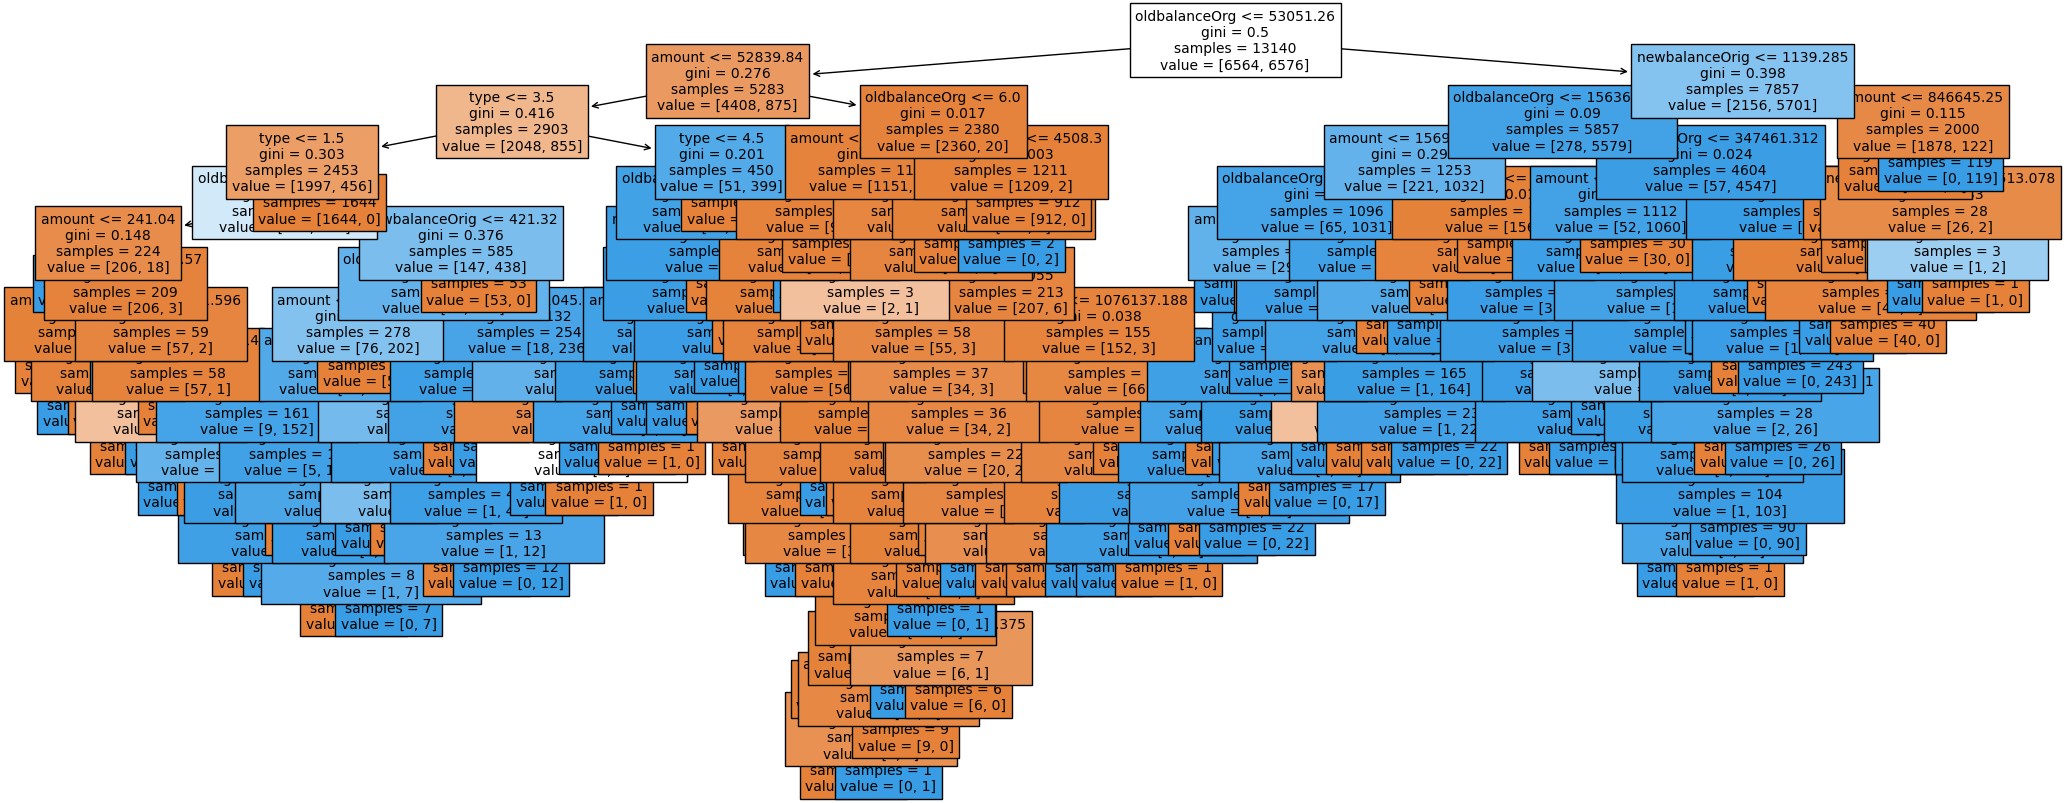

In [61]:
fig,ax=plt.subplots(figsize=(25,10))
chart=tree.plot_tree(dt,feature_names=x.columns,filled=True,fontsize=10)
plt.savefig("abc.jpg")

--------------------------------------------------------------------------------------------------------------------------------

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### performing pruning techniques to reduce overfitting problem

### Max depth

In [47]:
for i in range(1,30):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    train=dt.score(xtrain,ytrain)
    test=dt.score(xtest,ytest)
    print(f",max depth:{i} training score:{train} testing score:{test}")

,max depth:1 training score:0.7693302891933029 testing score:0.7754108338405356
,max depth:2 training score:0.9029680365296804 testing score:0.8995739500912964
,max depth:3 training score:0.9385083713850837 testing score:0.9449178332318929
,max depth:4 training score:0.9605783866057839 testing score:0.9586122945830797
,max depth:5 training score:0.9784627092846271 testing score:0.9796104686548995
,max depth:6 training score:0.9864535768645357 testing score:0.9856968959220938
,max depth:7 training score:0.989117199391172 testing score:0.9863055386488131
,max depth:8 training score:0.9942161339421614 testing score:0.9905660377358491
,max depth:9 training score:0.995662100456621 testing score:0.9911746804625685
,max depth:10 training score:0.997869101978691 testing score:0.992696287279367
,max depth:11 training score:0.9986301369863013 testing score:0.992696287279367
,max depth:12 training score:0.9990867579908675 testing score:0.992696287279367
,max depth:13 training score:0.999695585996

In [48]:
dt1=DecisionTreeClassifier(max_depth=5)
mymodel(dt1)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1649
           1       0.96      1.00      0.98      1637

    accuracy                           0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286

training score:0.9784627092846271
 testing score:0.9796104686548995


DecisionTreeClassifier(max_depth=5)

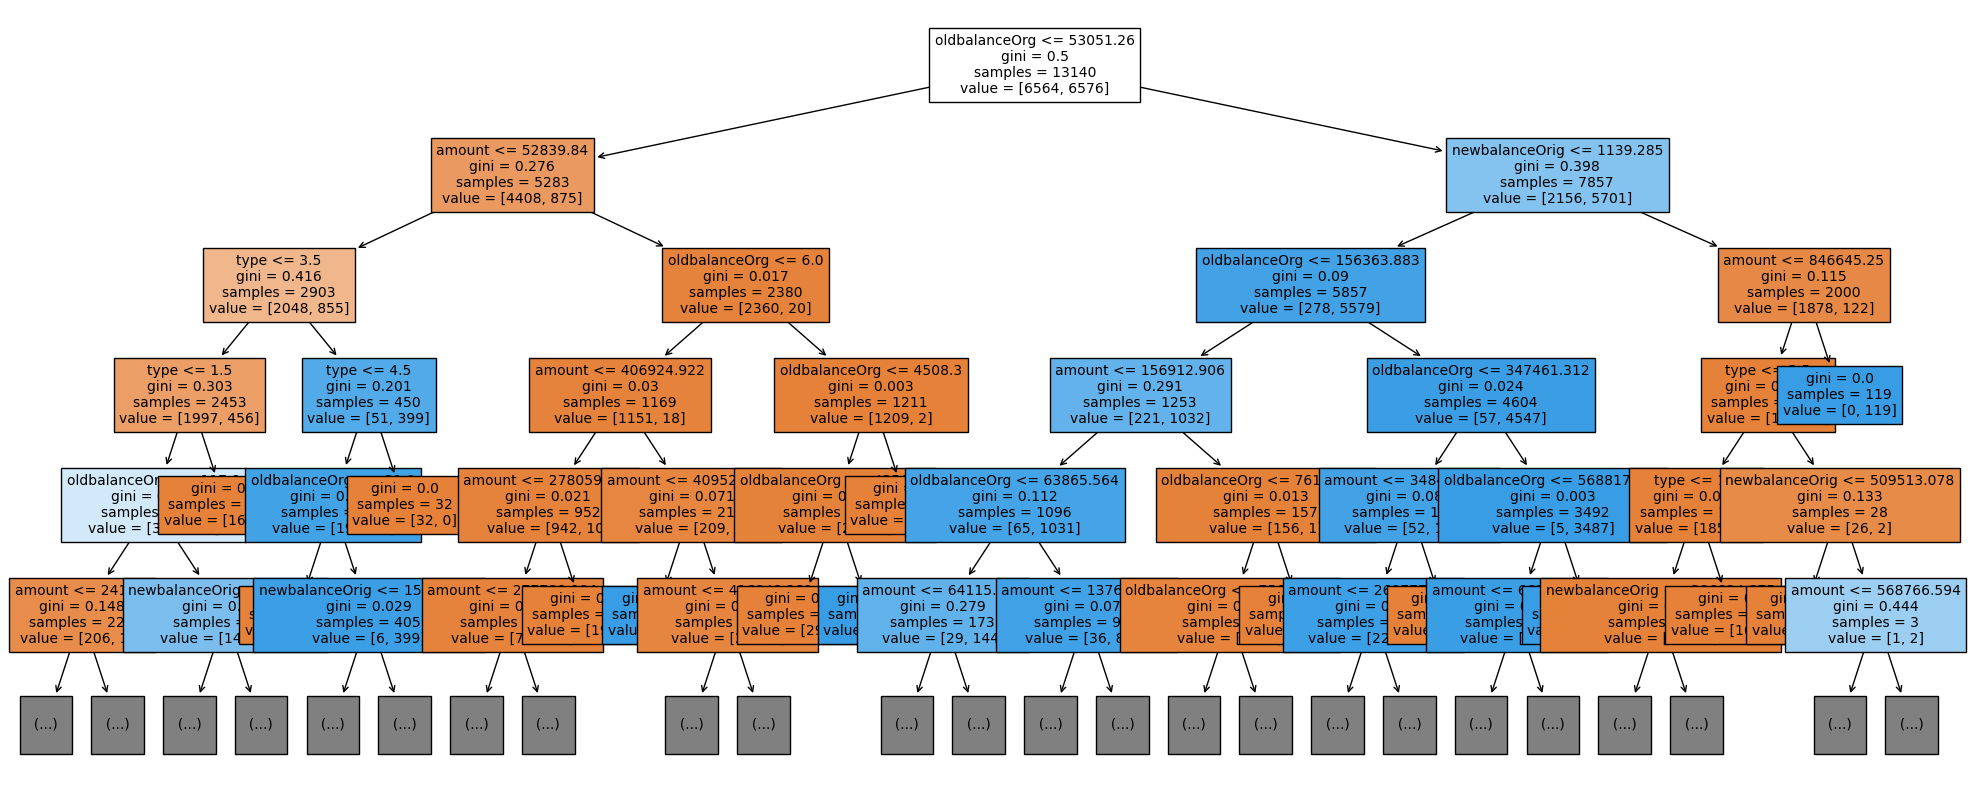

In [60]:
fig,ax=plt.subplots(figsize=(25,10))
chart=tree.plot_tree(dt,max_depth=5,feature_names=x.columns,filled=True,fontsize=10)
plt.savefig("abc.jpg")

#### Observation

**After Perorming Max depth Hypertuning Technique   
The accurcy of model is 98%   
and the training and testing score are equal  
But in the precision the 0 is 1.00  
The model is still overfitted**

--------------------------------------------------------------------------------------------------------------------------------

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Using min sample leaf

In [49]:
for i in range(1,30):
    dt2=DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    train=dt2.score(xtrain,ytrain)
    test=dt2.score(xtest,ytest)
    print(f",max depth:{i} training score:{train} testing score:{test}")

,max depth:1 training score:1.0 testing score:0.992696287279367
,max depth:2 training score:0.9969558599695586 testing score:0.9917833231892879
,max depth:3 training score:0.9964992389649924 testing score:0.9936092513694461
,max depth:4 training score:0.9960426179604261 testing score:0.9942178940961656
,max depth:5 training score:0.9955859969558599 testing score:0.9933049300060864
,max depth:6 training score:0.9952054794520548 testing score:0.992696287279367
,max depth:7 training score:0.9949771689497717 testing score:0.9923919659160073
,max depth:8 training score:0.9947488584474886 testing score:0.9923919659160073
,max depth:9 training score:0.9946727549467276 testing score:0.9920876445526476
,max depth:10 training score:0.9944444444444445 testing score:0.9914790018259282
,max depth:11 training score:0.9944444444444445 testing score:0.9917833231892879
,max depth:12 training score:0.9943683409436834 testing score:0.9914790018259282
,max depth:13 training score:0.9942161339421614 testin

In [50]:
dt3=DecisionTreeClassifier(min_samples_leaf=2)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1649
           1       0.99      0.99      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

training score:0.9969558599695586
 testing score:0.9920876445526476


DecisionTreeClassifier(min_samples_leaf=2)

### Observation

**The min sample leaf reduces the training score to 1 to 99  
and the accurecy and testing score also 99 and the model still overfitted   
hence the max depth did not hlep much to reduce overfitting**

--------------------------------------------------------------------------------------------------------------------------------

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Logistic regression

In [51]:
logreg=LogisticRegression()
logreg=LogisticRegression()
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1649
           1       0.87      0.99      0.93      1637

    accuracy                           0.92      3286
   macro avg       0.93      0.92      0.92      3286
weighted avg       0.93      0.92      0.92      3286

training score:0.9208523592085236
 testing score:0.920876445526476


LogisticRegression()

### Observation 

**The Logistic regression model Gives the accurecy of 93%  
the training score: 92  
and the testing score: 92  
the model is not overfitted   
the model perform well on data** 


--------------------------------------------------------------------------------------------------------------------------------

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## SVM (Support Vector Machie)

In [52]:
svm=SVC()
mymodel(svm)

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1649
           1       0.97      0.76      0.85      1637

    accuracy                           0.87      3286
   macro avg       0.88      0.87      0.86      3286
weighted avg       0.88      0.87      0.86      3286

training score:0.8606544901065449
 testing score:0.8660986001217286


SVC()

### Obervation

**The SVM model gives of accurecy 87  
The training score: 86  
and the testing score: 86  
the model is not overfitted   
may be after performing Hypertuning on SVM it may give better accurecy**

-------------------------------------------------------------------------------------------------------------------------------

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Ensemble learning

### Bagging

In [53]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(LogisticRegression())
mymodel(bg)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1649
           1       0.86      0.99      0.92      1637

    accuracy                           0.92      3286
   macro avg       0.93      0.92      0.92      3286
weighted avg       0.93      0.92      0.92      3286

training score:0.9161339421613395
 testing score:0.91661594643944


BaggingClassifier(estimator=LogisticRegression())

### Obervation

**The Bagging Technique with Logistic regression gives accurecy 92 
The training score: 92  
and the testing score: 92  
the model is not overfitted**

--------------------------------------------------------------------------------------------------------------------------------

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### with voting classifire

In [54]:
from sklearn.ensemble import VotingClassifier
Vc=VotingClassifier(estimators=[("Logistic",LogisticRegression()),("Svm",SVC())])
mymodel(Vc)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1649
           1       0.97      0.76      0.85      1637

    accuracy                           0.87      3286
   macro avg       0.89      0.87      0.87      3286
weighted avg       0.89      0.87      0.87      3286

training score:0.8620243531202435
 testing score:0.8673158855751674


VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('Svm', SVC())])

### Obervation

**The Voting classifire Technique using Logistic regression and SVM algorithm gives accurecy 87 
The training score: 89  
and the testing score: 89  
the model is not overfitted**

--------------------------------------------------------------------------------------------------------------------------------

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Boosting Technique

### 1) adaboost

In [55]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
mymodel(ada)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1649
           1       0.96      1.00      0.98      1637

    accuracy                           0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286

training score:0.9751141552511415
 testing score:0.9768715763846622


AdaBoostClassifier()

### Obervation

**The Adaboost gives accurecy 98 
The training score: 97  
and the testing score: 97  
The precison score of 0 is 1.0  
the model is  overfitted**

--------------------------------------------------------------------------------------------------------------------------------

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

##### 2) Gradient boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gc=GradientBoostingClassifier()
mymodel(gc)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1649
           1       0.98      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

training score:0.9884322678843227
 testing score:0.9887401095556908


GradientBoostingClassifier()

### Obervation

**The Gradient boosting gives accurecy 99   
The training score: 98   
and the testing score: 98  
But the precision score of 0 id 1.0  
the model is overfitted**

--------------------------------------------------------------------------------------------------------------------------------

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

##### 3)Extreem Gradient Boosting

In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
mymodel(xgb)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

training score:0.9971841704718417
 testing score:0.9939135727328059


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Obervation

**The Extreem Gradient boosting gives accurecy 99 
The training score: 99  
and the testing score: 99  
But the precision score of 0 id 1.0  
the model is overfitted**

In [59]:
model_list=[dt,dt1,dt3,logreg,svm,bg,Vc,ada,gc,xgb]
for i in model_list:
    i.fit(xtrain,ytrain)
    ypred=i.predict(xtest)
    train=i.score(xtrain,ytrain)
    test=i.score(xtest,ytest)
    
    print(i)
    print(f"Training score: {train}, Testing score: {test}")
    print(f"Model Accuracy score: {accuracy_score(ytest,ypred)*100} %")
    print("--------------------------------------------------------------------------------------------------------------------")
    

DecisionTreeClassifier(max_depth=29)
Training score: 1.0, Testing score: 0.9930006086427268
Model Accuracy score: 99.30006086427268 %
--------------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=5)
Training score: 0.9784627092846271, Testing score: 0.9796104686548995
Model Accuracy score: 97.96104686548995 %
--------------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(min_samples_leaf=2)
Training score: 0.9969558599695586, Testing score: 0.9923919659160073
Model Accuracy score: 99.23919659160073 %
--------------------------------------------------------------------------------------------------------------------
LogisticRegression()
Training score: 0.9208523592085236, Testing score: 0.920876445526476
Model Accuracy score: 92.08764455264759 %
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Conclusion



* The project aimed to address the challenge of detecting fraudulent transactions in a binary classification setting, where imbalanced data was a prominent issue. 

* Several machine learning models were explored, focusing on Logistic Regression, Random Forest,Decision tree, SVM(Support vector machine),Bagging,Boosting techniques with an emphasis on handling class imbalance through sampling techniques.

* We've discovered that machines are much better than people at handling large sets of data, especially in spotting patterns during a user's purchasing journey. Unlike human-made rules that catch only a few patterns, machine learning can predict fraud in a ton of transactions by using raw data.

**Here are three big reasons why using machine learning for fraud prevention is a smart move:**

Fast Processing: Machine learning works super fast. It can quickly check a huge number of transactions in real-time. This means it's always analyzing and handling new data as it comes in.

Handles Big Data: Machine learning gets better as it deals with more and more data. The more data it learns from, the better it becomes at recognizing different behaviors. Once it figures out which transactions are normal and which might be fraud, it can easily sort through them.

Saves Time and Effort: Machines are great at doing the same thing over and over. Machine learning does the heavy lifting of analyzing data, only bringing in humans when their input is really needed. It's also awesome at finding tricky patterns that might indicate fraud, sometimes even better than humans.